# Spam Classification using Naive Bayes and NLP
We use text analysis and a database of labelled mail and spam mail to train a Naive Bayes classifier to recognise SPAM

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
plt.style.use('seaborn')

import seaborn as sn
%matplotlib inline

## Simple Example of NLP

In [2]:
from sklearn.feature_extraction.text import CountVectorizer
count = CountVectorizer(min_df=1)

In [3]:
docs = np.array(["EDHEC is the best business school in the world", "Machine learning is cool", "EDHEC teaches Machine Learning"])
# Find the bag of words in the corpus
count.fit(docs)

CountVectorizer()

In [4]:
print(count.vocabulary_)

{'edhec': 3, 'is': 5, 'the': 10, 'best': 0, 'business': 1, 'school': 8, 'in': 4, 'world': 11, 'machine': 7, 'learning': 6, 'cool': 2, 'teaches': 9}


In [5]:
bag = count.transform(docs)
print(bag.toarray())

[[1 1 0 1 1 1 0 0 1 0 2 1]
 [0 0 1 0 0 1 1 1 0 0 0 0]
 [0 0 0 1 0 0 1 1 0 1 0 0]]


### Loading the Training Emails into a DataFrame
The purpose of this is to load all the emails into a program that counts the word frequency for all of the words across all of the emails in the training set. 

In [6]:
train_dir = './data/spamdetector/train-mails'

In [14]:
def makeEmailDataframe(train_dir):
        
    emails = [os.path.join(train_dir,f) for f in os.listdir(train_dir)]    
    rows = []
    
    for mail in emails:    
        
        classification = 'ham'
        
        if mail.find('spmsg') > 0:
            classification = 'spam'
        
        with open(mail, errors="ignore") as m:
            txt = ''
            for line in m:
                txt += line
            
            length = len(txt)
            
        rows.append({'filename': mail, 'length': length, 'text':txt, 'class':classification})
    
    data_frame = pd.DataFrame(rows)
    
    return data_frame

In [15]:
X_train = makeEmailDataframe(train_dir)

In [16]:
X_train.shape

(703, 4)

In [17]:
X_train.head(10)

,filename,length,text,class
0,./data/spamdetector/train-mails\3-1msg1.txt,728,Subject: re : 2 . 882 s - > np np\n\n> deat : ...,ham
1,./data/spamdetector/train-mails\3-1msg2.txt,424,Subject: s - > np + np\n\ndiscussion s - > np ...,ham
2,./data/spamdetector/train-mails\3-1msg3.txt,111,Subject: 2 . 882 s - > np np\n\n. . . 's much ...,ham
3,./data/spamdetector/train-mails\3-375msg1.txt,6364,"Subject: gent conference\n\n"" listserv "" inter...",ham
4,./data/spamdetector/train-mails\3-378msg1.txt,181,Subject: query : causative korean\n\nanyone po...,ham
5,./data/spamdetector/train-mails\3-378msg2.txt,735,Subject: l2 learn / cultural empathy\n\ngradua...,ham
6,./data/spamdetector/train-mails\3-378msg3.txt,278,Subject: psycholinguistic teach\n\nundergradua...,ham
7,./data/spamdetector/train-mails\3-378msg4.txt,122,Subject: german corpora\n\non-line corpus mode...,ham
8,./data/spamdetector/train-mails\3-378msg5.txt,323,"Subject: t\n\nhi , help ! design experiment ma...",ham
9,./data/spamdetector/train-mails\3-379msg1.txt,674,Subject: job - university utah\n\nlinguistic p...,ham


In [18]:
# Let us examine a HAM email 
row = 140
print(X_train.text[row])
print("Class is:",X_train['class'][row])

Subject: * * * correction hellenistic greek announcement

couple day ago send fyi hellenistic greek linguistic resource . yet send , able correct url http : / / tartarus . uwa . edu . au / hgrk : http : / / www . uwa . edu . au / hgrk many thanks . jame k . tauber ( jtauber @ tartarus . uwa . edu . au ) 4th honour student , centre linguistic university western australium , wa 6009 , australia

Class is: ham


In [19]:
# Let us examine a SPAM email 
row = 655
print(X_train.text[row])
print("Class is:",X_train['class'][row])

Subject: change life $ 15 . 55

money excuses . . . both ! ! ! " dares nothing , need hope anything " . " invest little , energy little money search rest life " . surely hear four reports - . = 20 here real fact . deal multus level market = = 20 require promote upline promote = downline . believe different thing . = invest = 20 little money , require , why promote = . let care themselve , themselve . each every one report list below capability = change life forever . apply life . order postmark within ten day e-mail , = four report $ 15 . 0 self-address stamp ( . 55 cent = postage ) envelope . save five dollar , postage , envelope mailing . better spend $ 15 . 55 change = life forever . downside : invest $ 15 . 55 receive 4 report nothing = . upside : invest $ 15 . 55 receive 4 report , utilize , = pave road financial success freedom . = 20 seem worthwhile investment gamble ! ! ! where else small investment pay off excite = . 's call ! ! ! list below four report change life , = guarant

In [20]:
X_train.head()

,filename,length,text,class
0,./data/spamdetector/train-mails\3-1msg1.txt,728,Subject: re : 2 . 882 s - > np np\n\n> deat : ...,ham
1,./data/spamdetector/train-mails\3-1msg2.txt,424,Subject: s - > np + np\n\ndiscussion s - > np ...,ham
2,./data/spamdetector/train-mails\3-1msg3.txt,111,Subject: 2 . 882 s - > np np\n\n. . . 's much ...,ham
3,./data/spamdetector/train-mails\3-375msg1.txt,6364,"Subject: gent conference\n\n"" listserv "" inter...",ham
4,./data/spamdetector/train-mails\3-378msg1.txt,181,Subject: query : causative korean\n\nanyone po...,ham


In [21]:
X_train.tail()

,filename,length,text,class
698,./data/spamdetector/train-mails\spmsgc5.txt,697,"Subject: vote # 1 online business\n\nhi , drop...",spam
699,./data/spamdetector/train-mails\spmsgc6.txt,560,"Subject: read ! !\n\ndream ? member our team ,...",spam
700,./data/spamdetector/train-mails\spmsgc7.txt,582,Subject: search . . . credibility ! ! !\n\ndre...,spam
701,./data/spamdetector/train-mails\spmsgc8.txt,1030,Subject: financial freedom while sleep\n\ndear...,spam
702,./data/spamdetector/train-mails\spmsgc9.txt,413,Subject: re : major acquisition !\n\ncompany :...,spam


<Figure size 720x432 with 0 Axes>

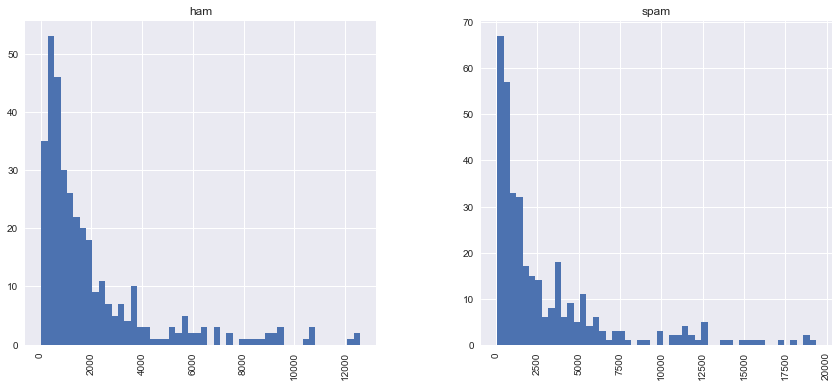

In [24]:
# Examine length of Spam vs Ham Emails 
plt.figure(figsize=(10,6));
X_train.hist(column="length", by = "class", bins=50, figsize = (14,6));

Seem to be some really long messages. Distribution looks quite natural. Nothing significantly different between spam and non-spam.

### Load Stop Words

In [25]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopWords = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dominic\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [26]:
print(stopWords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

### Create Bag of Words from Emails

In [27]:
from sklearn.feature_extraction.text import CountVectorizer

In [28]:
# Set up the count vectorizer 
train_count = CountVectorizer(min_df=1, stop_words = stopWords)

In [29]:
# Teach it all of the emails, both SPAM and HAM
train_count.fit(X_train['text'].values)

CountVectorizer(stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours',
                            'ourselves', 'you', "you're", "you've", "you'll",
                            "you'd", 'your', 'yours', 'yourself', 'yourselves',
                            'he', 'him', 'his', 'himself', 'she', "she's",
                            'her', 'hers', 'herself', 'it', "it's", 'its',
                            'itself', ...])

In [30]:
# Examine its vocabulary 
len(train_count.vocabulary_)

19609

In [31]:
train_count.vocabulary_

{'subject': 16993,
 '882': 1845,
 'np': 12992,
 'deat': 5860,
 'sun': 17094,
 '15': 326,
 'dec': 5873,
 '91': 1901,
 '25': 714,
 'est': 7196,
 'michael': 12040,
 'mmorse': 12216,
 'vm1': 18825,
 'yorku': 19464,
 'ca': 4221,
 '864': 1823,
 'query': 14715,
 'wlodek': 19227,
 'zadrozny': 19503,
 'ask': 3103,
 'anything': 2872,
 'interest': 9919,
 'construction': 5303,
 'second': 15886,
 'much': 12446,
 'relate': 15076,
 'consider': 5275,
 'form': 7888,
 'discuss': 6333,
 'list': 11253,
 'late': 10907,
 'reduplication': 14982,
 'logical': 11331,
 'sense': 15981,
 'john': 10325,
 'mcnamara': 11860,
 'name': 12569,
 'tautologous': 17394,
 'thus': 17683,
 'level': 11080,
 'indistinguishable': 9673,
 'support': 17129,
 'logic': 11329,
 'base': 3464,
 'semantics': 15956,
 'irrelevant': 10072,
 'natural': 12607,
 'language': 10869,
 'supplies': 17126,
 'value': 18601,
 'attribute': 3209,
 'follow': 7846,
 'fact': 7502,
 'relevant': 15097,
 'entity': 7071,
 'chaim': 4559,
 'shmendrik': 16161,
 'f

In [32]:
# We can examine all the feature words which have been ordered alphabetically 
print(train_count.get_feature_names())

['00', '000', '000bp', '0031', '00333', '0037', '0057', '0073', '0074', '00919680', '00am', '00pm', '00uzheb', '01', '0106', '0108', '011', '0118', '0139', '013953', '013a', '014863', '014893', '015491', '015509', '01701', '01bd8356', '01in', '02', '0244', '02814', '02816', '0293', '02osine', '0306', '0312', '0342', '0343', '0363', '0371', '03901', '04', '0442', '04627caa', '047mdrelrp11', '04g', '05', '0521', '0536088', '0615', '0621', '0623', '0633', '0642', '06483', '0657', '0685', '07083', '0796', '07974', '08', '080', '08015', '08017', '08028', '08080', '0811', '0814', '0821', '08402', '0845', '0856', '08619', '0870', '08700', '08848', '0885', '08903', '0897', '09', '0900', '090029hst', '0909', '091', '09107', '092', '0959358', '0987', '0989', '0990', '0994', '0b', '0in', '10', '100', '1000', '10000', '100000', '100064', '1001', '10010', '100101', '10011', '10019', '10036', '1007', '1009', '100k', '100khz', '100mb', '100mg', '100mhz', '100pf', '100x', '101', '1010', '1011', '10131

In [33]:
bag = train_count.transform(X_train['text'].values)

In [34]:
# There is a row for each email and one for every word in the vocabulary labelled with a 1 if it is present
bag.toarray().shape

(703, 19609)

In [35]:
np.sum(bag.toarray() > 0)/np.sum(bag.toarray() > -1)*100

0.8024300392734866

In [36]:
bag.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

### Example Message

In [37]:
numWords = bag.toarray().shape[1]

This is the email

Subject: * * * correction hellenistic greek announcement

couple day ago send fyi hellenistic greek linguistic resource . yet send , able correct url http : / / tartarus . uwa . edu . au / hgrk : http : / / www . uwa . edu . au / hgrk many thanks . jame k . tauber ( jtauber @ tartarus . uwa . edu . au ) 4th honour student , centre linguistic university western australium , wa 6009 , australia

In [38]:
# And we see its representation in the bag of words - SLOOWWWW
email = 140
if 1==0: 
    for i in range(0,numWords):
        v = bag.toarray()[email][i]
        if v != 0:
            print(i, v, train_count.get_feature_names()[i])

## Train Classifier

In [39]:
from sklearn.naive_bayes import MultinomialNB

In [40]:
classifier = MultinomialNB()

In [41]:
train_targets = X_train['class'].values

In [42]:
train_targets

array(['ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham',
       'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham',
       'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham',
       'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham',
       'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham',
       'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham',
       'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham',
       'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham',
       'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham',
       'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham',
       'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham',
       'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham',
       'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham',
       'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham',
       'ham', 'ham',

In [43]:
classifier.fit(bag,train_targets)

MultinomialNB()

## Testing the Classifier

In [44]:
test_dir = './data/spamdetector/test-mails'

In [45]:
X_test = makeEmailDataframe(test_dir)

In [46]:
X_test.head()

,filename,length,text,class
0,./data/spamdetector/test-mails\8-899msg1.txt,2949,Subject: book : phonetic / speech production\n...,ham
1,./data/spamdetector/test-mails\8-900msg1.txt,1204,Subject: book : syntax\n\nsusanne winkler focu...,ham
2,./data/spamdetector/test-mails\8-901msg1.txt,1690,Subject: book : english linguistic\n\njohan el...,ham
3,./data/spamdetector/test-mails\8-905msg1.txt,1142,Subject: workshop language space\n\nalan c . h...,ham
4,./data/spamdetector/test-mails\8-905msg2.txt,1980,Subject: table ronde sur la langue et la litte...,ham


In [47]:
X_test.tail()

,filename,length,text,class
256,./data/spamdetector/test-mails\spmsgc95.txt,399,Subject: lucky !\n\ncongratulation ! ' ve sele...,spam
257,./data/spamdetector/test-mails\spmsgc96.txt,3783,Subject: capitalfm . com\n\nhttp : / / capital...,spam
258,./data/spamdetector/test-mails\spmsgc97.txt,813,Subject: submit 600\n\nspam ; receive message ...,spam
259,./data/spamdetector/test-mails\spmsgc98.txt,813,Subject: submit 600\n\nspam ; receive message ...,spam
260,./data/spamdetector/test-mails\spmsgc99.txt,11444,Subject: ' t stand ! ! ! ! ! ! !\n\ndear inter...,spam


In [48]:
test_count = train_count.transform(X_test['text'].values)

In [49]:
test_targets = X_test['class'].values

In [50]:
test_predictions = classifier.predict(test_count)

In [51]:
test_predictions

array(['ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham',
       'ham', 'spam', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham',
       'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham',
       'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham',
       'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham',
       'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham',
       'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham',
       'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham',
       'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham',
       'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham',
       'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham',
       'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham',
       'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham',
       'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham',
       'ham', 'ham'

In [52]:
test_targets

array(['ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham',
       'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham',
       'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham',
       'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham',
       'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham',
       'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham',
       'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham',
       'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham',
       'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham',
       'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham',
       'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham',
       'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham',
       'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham',
       'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham',
       'ham', 'ham',

In [53]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(test_targets, test_predictions)

In [54]:
import HelpfulFunctions as hp

In [57]:
print(cm)

[[130   1]
 [  4 126]]
